# Data spaces thesis
## Andrea Settimo 262710
## Leonardo Tolomei 267638
___________________________________________________________________________________________________________________

## Import part

In [87]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree


___________________________________________________________________________________________________________________

## 1. Load the dataset

Link: http://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [9]:
dataset = pd.read_csv("./Dataset/forestfires.csv")
dataset.head()                                      # Shows the first five rows.


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


___________________________________________________________________________________________________________________

## 2. Data Analysis

**The dataset size is:**

In [3]:
dataset.shape


(517, 13)

**The dataset features are:**

In [4]:
featureNames = list(dataset)
print(featureNames)


['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


**The meaning of features:**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 (this feature is the target)

**Statistics:**

In [5]:
dataset.describe()
print(f"Missing values: {dataset.isnull().sum()}")

Missing values: X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


**Features distributions:**

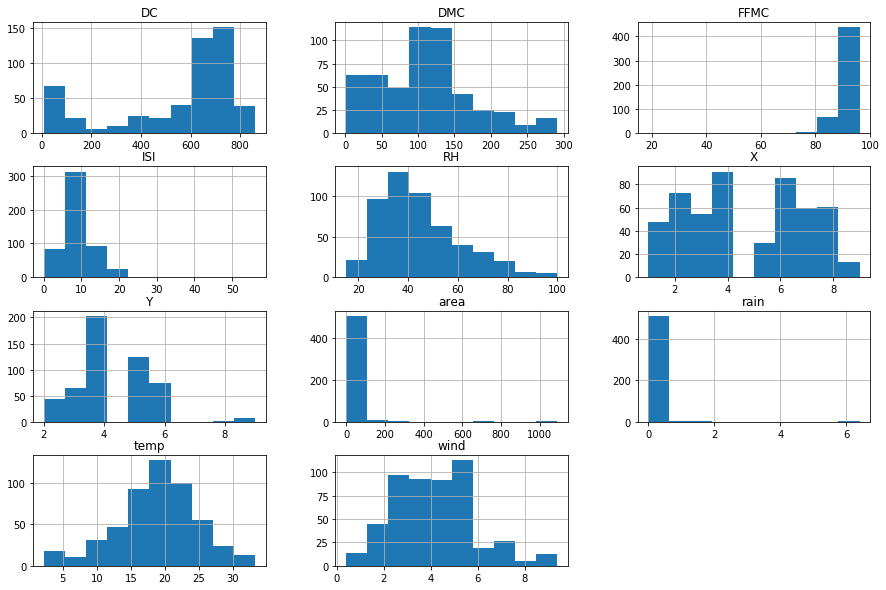

In [6]:
dataset.hist(figsize=(15,10))
plt.show()

**Box plot:**

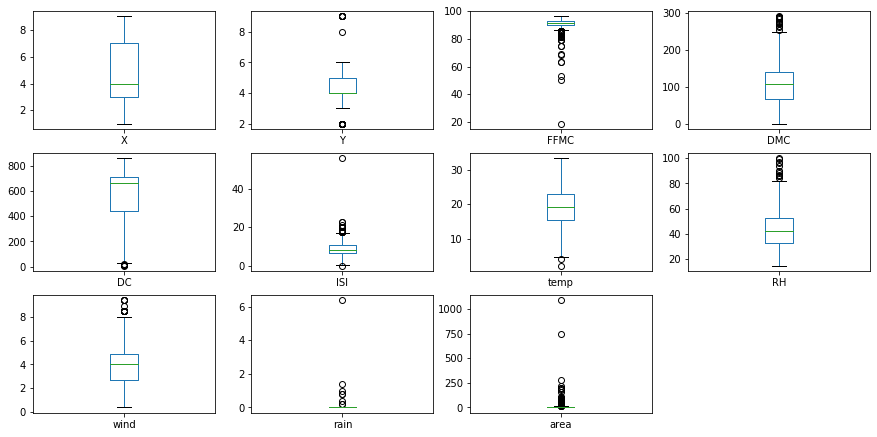

In [7]:
dataset.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.show()

**Correletion Matrix:**

Pre-Processing the dataset: trasformazione della features month e day in numeri cosi da poter calcolare la matrice di correlazione

In [10]:
months = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11,
}
days = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
    'sat': 5,
    'sun': 6
}

for i in range(len(dataset)):
    dataset.iloc[i, 2] = months[dataset.iloc[i, 2]]
    dataset.iloc[i, 3] = days[dataset.iloc[i, 3]]


In [9]:
dataset.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


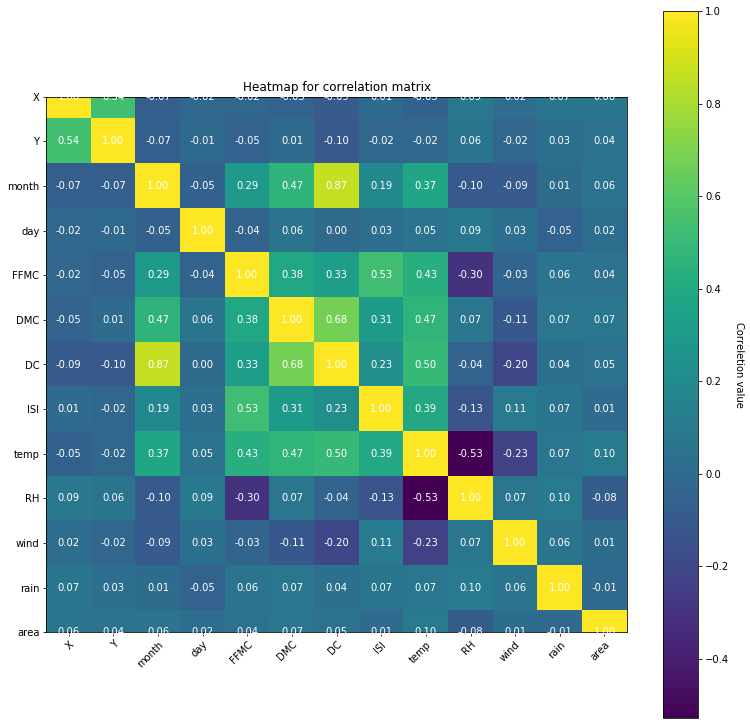

In [10]:
correlations = dataset.corr()
fig, ax = plt.subplots(figsize=(13,13))
im = ax.imshow(correlations)
ax.set_xticks(np.arange(len(featureNames)))
ax.set_yticks(np.arange(len(featureNames)))
# label them with the respective list entries
ax.set_xticklabels(featureNames)
ax.set_yticklabels(featureNames)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(featureNames)):
    for j in range(len(featureNames)):
        text = ax.text(j, i, "{0:.2f}".format(correlations.iloc[i, j]), ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correletion value", rotation=-90, va="bottom")

ax.set_title("Heatmap for correlation matrix")
plt.show()


The correletion matrix in detail:

In [11]:
correlations

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


**Target value**:

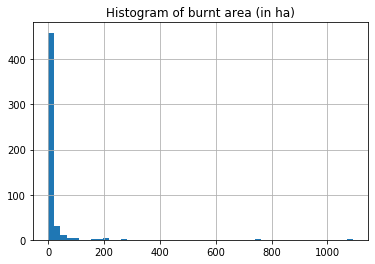

In [4]:
dataset['area'].hist(bins=50)
plt.title('Histogram of burnt area (in ha)')
plt.show()

Burnt area is very skewed, with the majority of the fires presenting a small size. The logarithm function can be applied to reduce skewness and improve symmetry. More precisely, ln(x+1) transform can be applied and model prediction will need to be post-processed with the inverse transformation.

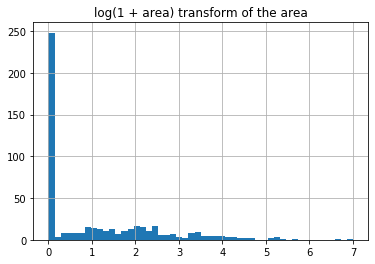

In [11]:
dataset['area'] = np.log(1 + dataset['area'])
dataset['area'].hist(bins=50)
plt.title('log(1 + area) transform of the area')
plt.show()

___________________________________________________________________________________________

Removing the target attribute from the dataset structure.

In [12]:
dataFrame = dataset
dataset = dataset.values

X = dataset[:,0:12]
Y = dataset[:,12]

**Dataset partition**
The dataset partition is given by:
- Train: 70%;
- Test: 30%.

Another operation on the dataset is the standardization.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The size of the training set is: 361
The size of the test set is: 156


____________________________________________________________________

## 3. Definition of functions

### 3.1 PCA

In [84]:
def plotPCACumulativeExplainedVariance(pca):
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='orange')
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained variance by different principal components')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance in percent');

In [85]:
def makePCA(X_train_, X_test_):
    pca = PCA(n_components=.95)
    pca.fit(X_train_)
    X_train_pca = pca.transform(X_train_)
    X_test_pca = pca.transform(X_test_)
    plotPCACumulativeExplainedVariance(pca)
    return X_train_pca, X_test_pca

Apply the mapping between the old representetion and the new representation.

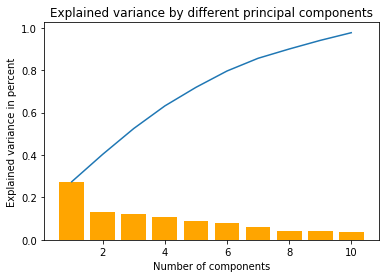

In [86]:
X_train_pca, X_test_pca = makePCA(X_train, X_test)

Aggiungere il grafico della varianza

### 3.2 Linear regression 

In [114]:
def makeLinearRegression(X_train_, Y_train_, X_test_, Y_test_):
    model = LinearRegression()
    model.fit(X_train_, Y_train_)
    Y_predict = model.predict(X_test_)
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_, Y_predict))
    print("Train results:")
    Y_predict_train = model.predict(X_train_)
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_, Y_predict_train)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_, Y_predict_train))

**With PCA:**

In [19]:
makeLinearRegression(X_train_pca, Y_train, X_test_pca, Y_test)

Test results:
	RMSE: 1.521457665009469
	MAE: 1.2164999435336101
Train results:
	RMSE: 1.3275040303369186
	MAE: 1.087017356042005


**Without PCA:**

In [20]:
makeLinearRegression(X_train, Y_train, X_test, Y_test)

Test results:
	RMSE: 1.526164421000578
	MAE: 1.2084178880527585
Train results:
	RMSE: 1.3183701893031154
	MAE: 1.0761241834856519


The prediction of the model with PCA is better then the result of the model without PCA.

### 3.3 Decision Tree Regression

In [94]:
def makeDecisionTree(X_train_, Y_train_, X_test_, Y_test_):
    decisionTree = GridSearchCV(estimator=DecisionTreeRegressor(),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "friedman_mse", "mae"]},
                                cv=10, iid=False)
    decisionTree.fit(X_train_, Y_train_)
    Y_predict = decisionTree.predict(X_test_)
    print("Params:",decisionTree.best_params_)
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_, Y_predict))
    print("Train results:")
    Y_predict_train = decisionTree.predict(X_train_)
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_, Y_predict_train)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_, Y_predict_train))
    tree.plot_tree(decisionTree.best_estimator_)

**With PCA:**

Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5230150974274639
	MAE: 1.2197196089382167
Train results:
	RMSE: 1.3232678620721239
	MAE: 1.0737538132343867


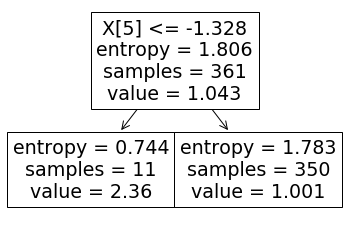

In [95]:
makeDecisionTree(X_train_pca, Y_train, X_test_pca, Y_test)

**Without PCA:**

Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5271850069349655
	MAE: 1.2145514341853476
Train results:
	RMSE: 1.321200279337473
	MAE: 1.072778377412521


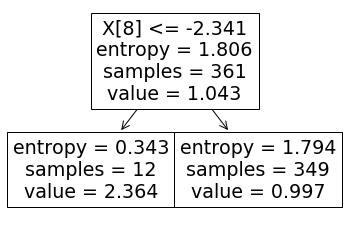

In [96]:
makeDecisionTree(X_train, Y_train, X_test, Y_test)

### 3.4 Random forest

In [24]:
def makeRandomForest(X_train_, Y_train_, X_test_, Y_test_):
    randomForest = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "mae"]},
                                cv=10, iid=False, n_jobs=-1)
    randomForest.fit(X_train_, Y_train_)
    Y_predict = randomForest.predict(X_test_)
    print("Params:",randomForest.best_params_)
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_, Y_predict))
    print("Train results:")
    Y_predict_train = randomForest.predict(X_train_)
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_, Y_predict_train)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_, Y_predict_train))

**With PCA:**

In [25]:
makeRandomForest(X_train_pca, Y_train, X_test_pca, Y_test)

Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.513546315596392
	MAE: 1.2134682953402338
Train results:
	RMSE: 1.30469952003441
	MAE: 1.0833026296156816


**Without PCA:**

In [26]:
makeRandomForest(X_train, Y_train, X_test, Y_test)

Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5169046351012165
	MAE: 1.2133385698985228
Train results:
	RMSE: 1.317447940716109
	MAE: 1.081958668122222


### 3.5 SVR

In [27]:
def makeSVR(X_train_, Y_train_, X_test_, Y_test_):
    svr = GridSearchCV(estimator=SVR(),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                                cv=10, iid=False, verbose=1, n_jobs=-1)
    svr.fit(X_train_, Y_train_)
    Y_predict = svr.predict(X_test_)
    print("Params:",svr.best_params_)
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_, Y_predict))
    print("Train results:")
    Y_predict_train = svr.predict(X_train_)
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_, Y_predict_train)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_, Y_predict_train))

**With PCA:**

In [28]:
makeSVR(X_train_pca, Y_train, X_test_pca, Y_test)

Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 5199 tasks      | elapsed:   32.9s


Params: {'C': 10, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5240460914757004
	MAE: 1.2181294958588285
Train results:
	RMSE: 1.30960033107935
	MAE: 1.071300894125916


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 38.4min finished


**Without PCA:**

In [29]:
makeSVR(X_train, Y_train, X_test, Y_test)

Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5230431051135782
	MAE: 1.2157821069734678
Train results:
	RMSE: 1.3283352801636417
	MAE: 1.089303018761867


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 32.7min finished


### 3.6 K-NN

In [30]:
def makeKNN(X_train_, Y_train_, X_test_, Y_test_):
    knn = GridSearchCV(estimator=KNeighborsRegressor(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, iid=False, verbose=1, n_jobs=-1)
    knn.fit(X_train_, Y_train_)
    Y_predict = knn.predict(X_test_)
    print("Params:",knn.best_params_)
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_, Y_predict))
    print("Train results:")
    Y_predict_train = knn.predict(X_train_)
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_, Y_predict_train)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_, Y_predict_train))

**With PCA:**

In [31]:
makeKNN(X_train_pca, Y_train, X_test_pca, Y_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'n_neighbors': 19, 'p': 1}
Test results:
	RMSE: 1.5420862823053485
	MAE: 1.226995495491759
Train results:
	RMSE: 1.3085397375907986
	MAE: 1.0587002621274857


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.4s finished


**Without PCA:**

In [32]:
makeKNN(X_train, Y_train, X_test, Y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Params: {'n_neighbors': 19, 'p': 2}
Test results:
	RMSE: 1.5567013061066273
	MAE: 1.2427130505456252
Train results:
	RMSE: 1.2948447208481906
	MAE: 1.0407068343087602


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


___________________________________________________________________________________________________________________

## 4. Features selection

### 4.1 STFWI 

STFWI – using spatial, temporal and the four FWI components:
- X
- Y
- month
- day 
- FFMC
- DMC
- DC
- ISI

In [98]:
dataset_STFWI = dataFrame[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'area']].values

X_STFWI = dataset_STFWI[:,0:8]
Y_STFWI = dataset_STFWI[:,8]

In [99]:
X_train_STFWI, X_test_STFWI, Y_train_STFWI, Y_test_STFWI = train_test_split( X_STFWI, Y_STFWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STFWI)
# Apply transform to both the training set and the test set.
X_train_STFWI = scaler.transform(X_train_STFWI)
X_test_STFWI = scaler.transform(X_test_STFWI)

**PCA**

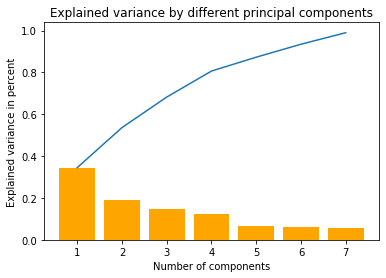

In [100]:
X_train_pca_STFWI, X_test_pca_STFWI = makePCA(X_train_STFWI, X_test_STFWI)

**Linear Regression**

In [36]:
print("With PCA:")
makeLinearRegression(X_train_pca_STFWI, Y_train_STFWI, X_test_pca_STFWI, Y_test_STFWI)
print("Without PCA:")
makeLinearRegression(X_train_STFWI, Y_train_STFWI, X_test_STFWI, Y_test_STFWI)

With PCA:
Test results:
	RMSE: 1.5278027053894834
	MAE: 1.224339588536563
Train results:
	RMSE: 1.331546013632638
	MAE: 1.0966578035250538
Without PCA:
Test results:
	RMSE: 1.524763146443445
	MAE: 1.2072872750284944
Train results:
	RMSE: 1.3201638897339627
	MAE: 1.0817776175857683


**Decison Tree**

With PCA:
Params: {'criterion': 'friedman_mse', 'max_depth': 1}
Test results:
	RMSE: 1.5695346654993054
	MAE: 1.254674641874543
Train results:
	RMSE: 1.3260227696396452
	MAE: 1.1090422708741945
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5150588080891034
	MAE: 1.2061019139557552
Train results:
	RMSE: 1.325652155771835
	MAE: 1.0794189272806938


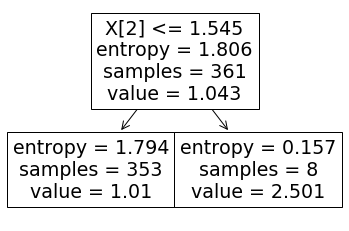

In [101]:
print("With PCA:")
makeDecisionTree(X_train_pca_STFWI, Y_train_STFWI, X_test_pca_STFWI, Y_test_STFWI)
print("Without PCA:")
makeDecisionTree(X_train_STFWI, Y_train_STFWI, X_test_STFWI, Y_test_STFWI)

**Random forest**

In [38]:
print("With PCA:")
makeRandomForest(X_train_pca_STFWI, Y_train_STFWI, X_test_pca_STFWI, Y_test_STFWI)
print("Without PCA:")
makeRandomForest(X_train_STFWI, Y_train_STFWI, X_test_STFWI, Y_test_STFWI)

With PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5405572673305146
	MAE: 1.2297966205841773
Train results:
	RMSE: 1.315316855385707
	MAE: 1.0943767551469308
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5147042807508273
	MAE: 1.2123822086118492
Train results:
	RMSE: 1.32206659314645
	MAE: 1.0861630008428393


**SVR**

In [39]:
print("With PCA:")
makeSVR(X_train_pca_STFWI, Y_train_STFWI, X_test_pca_STFWI, Y_test_STFWI)
print("Without PCA:")
makeSVR(X_train_STFWI, Y_train_STFWI, X_test_STFWI, Y_test_STFWI)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5767 tasks      | elapsed:   22.6s


Params: {'C': 1000, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5301167918015772
	MAE: 1.222117537091321
Train results:
	RMSE: 1.3247597439493077
	MAE: 1.0862355400096808
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 22.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'C': 1000, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5268497083609993
	MAE: 1.2185449989483803
Train results:
	RMSE: 1.3193112334025556
	MAE: 1.079803483604663


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 21.0min finished


**K-NN**

In [40]:
print("With PCA:")
makeKNN(X_train_pca_STFWI, Y_train_STFWI, X_test_pca_STFWI, Y_test_STFWI)
print("Without PCA:")
makeKNN(X_train_STFWI, Y_train_STFWI, X_test_STFWI, Y_test_STFWI)

With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'n_neighbors': 17, 'p': 2}
Test results:
	RMSE: 1.5574572833991625
	MAE: 1.2570108043947195
Train results:
	RMSE: 1.2985643177653308
	MAE: 1.052811924424528
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Params: {'n_neighbors': 17, 'p': 2}
Test results:
	RMSE: 1.5680696913409526
	MAE: 1.260617778774408
Train results:
	RMSE: 1.28713408459403
	MAE: 1.0426155670090054


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


### 4.2 STM

STM – with the spatial, temporal and four weather variables:
- X
- Y
- month
- day 
- temp
- RH
- wind
- rain

In [102]:
dataset_STM = dataFrame[['X', 'Y', 'month', 'day', 'temp', 'RH', 'wind', 'rain', 'area']].values

X_STM = dataset_STM[:,0:8]
Y_STM = dataset_STM[:,8]

In [103]:
X_train_STM, X_test_STM, Y_train_STM, Y_test_STM = train_test_split( X_STM, Y_STM, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STM)
# Apply transform to both the training set and the test set.
X_train_STM = scaler.transform(X_train_STM)
X_test_STM = scaler.transform(X_test_STM)

**PCA**

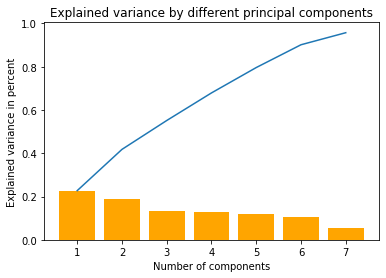

In [104]:
X_train_pca_STM, X_test_pca_STM = makePCA(X_train_STM, X_test_STM)

**Linear Regression**

In [44]:
print("With PCA:")
makeLinearRegression(X_train_pca_STM, Y_train_STM, X_test_pca_STM, Y_test_STM)
print("Without PCA:")
makeLinearRegression(X_train_STM, Y_train_STM, X_test_STM, Y_test_STM)

With PCA:
Test results:
	RMSE: 1.5181544595454892
	MAE: 1.2101206865959195
Train results:
	RMSE: 1.3287170370200618
	MAE: 1.0896634309340008
Without PCA:
Test results:
	RMSE: 1.5247727144528225
	MAE: 1.2191378846840035
Train results:
	RMSE: 1.3252997535644908
	MAE: 1.083446444746492


**Decision Tree**

With PCA:
Params: {'criterion': 'friedman_mse', 'max_depth': 1}
Test results:
	RMSE: 1.5150588080891034
	MAE: 1.2061019139557554
Train results:
	RMSE: 1.325652155771835
	MAE: 1.0794189272806936
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5271850069349655
	MAE: 1.2145514341853476
Train results:
	RMSE: 1.3212002793374733
	MAE: 1.0727783774125212


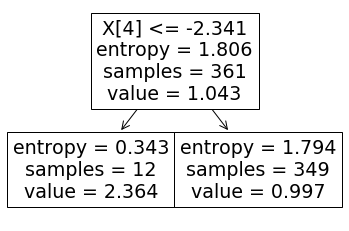

In [105]:
print("With PCA:")
makeDecisionTree(X_train_pca_STM, Y_train_STM, X_test_pca_STM, Y_test_STM)
print("Without PCA:")
makeDecisionTree(X_train_STM, Y_train_STM, X_test_STM, Y_test_STM)

**Random Forest**

In [46]:
print("With PCA:")
makeRandomForest(X_train_pca_STM, Y_train_STM, X_test_pca_STM, Y_test_STM)
print("Without PCA:")
makeRandomForest(X_train_STM, Y_train_STM, X_test_STM, Y_test_STM)

With PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5232559288428853
	MAE: 1.2161302444327675
Train results:
	RMSE: 1.314672245105069
	MAE: 1.083243949407328
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.51314794770151
	MAE: 1.209153963534704
Train results:
	RMSE: 1.3163624951237511
	MAE: 1.0776882592982218


**SVR**

In [47]:
print("With PCA:")
makeSVR(X_train_pca_STM, Y_train_STM, X_test_pca_STM, Y_test_STM)
print("Without PCA:")
makeSVR(X_train_STM, Y_train_STM, X_test_STM, Y_test_STM)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6845 out of 6860 | elapsed: 12.4min remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'C': 100, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 1.516477586975856
	MAE: 1.2150723867142472
Train results:
	RMSE: 1.2939591943820858
	MAE: 1.0558760111169214
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:    0.8s


Params: {'C': 10, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5178653688083663
	MAE: 1.2110202609647411
Train results:
	RMSE: 1.317708518618651
	MAE: 1.0776016006536293


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 15.6min finished


**K-NN**

In [48]:
print("With PCA:")
makeKNN(X_train_pca_STM, Y_train_STM, X_test_pca_STM, Y_test_STM)
print("Without PCA:")
makeKNN(X_train_STM, Y_train_STM, X_test_STM, Y_test_STM)

With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished


Params: {'n_neighbors': 19, 'p': 1}
Test results:
	RMSE: 1.5770014736563194
	MAE: 1.2665129795776875
Train results:
	RMSE: 1.311059198028629
	MAE: 1.0590647341219097
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'n_neighbors': 19, 'p': 1}
Test results:
	RMSE: 1.5806135937980168
	MAE: 1.2624265737628466
Train results:
	RMSE: 1.3029571014866248
	MAE: 1.0524755434381796


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished


### 4.3 FWI

FWI – using only the four FWI components:
- FFMC
- DMC
- DC
- ISI

In [110]:
dataset_FWI = dataFrame[['FFMC', 'DMC', 'DC', 'ISI', 'area']].values

X_FWI = dataset_FWI[:,0:4]
Y_FWI = dataset_FWI[:,4]

In [121]:
X_train_FWI, X_test_FWI, Y_train_FWI, Y_test_FWI = train_test_split( X_FWI, Y_FWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_FWI)
# Apply transform to both the training set and the test set.
X_train_FWI = scaler.transform(X_train_FWI)
X_test_FWI = scaler.transform(X_test_FWI)

**PCA**

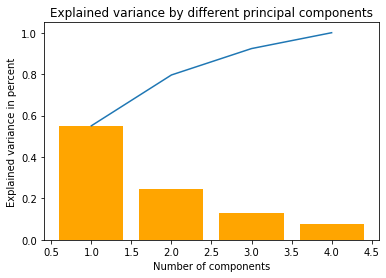

In [122]:
X_train_pca_FWI, X_test_pca_FWI = makePCA(X_train_FWI, X_test_FWI)

**Linear Regression**

In [115]:
print("With PCA:")
makeLinearRegression(X_train_pca_FWI, Y_train_FWI, X_test_pca_FWI, Y_test_FWI)
print("Without PCA:")
makeLinearRegression(X_train_FWI, Y_train_FWI, X_test_FWI, Y_test_FWI)

With PCA:
Test results:
	RMSE: 1.519198317604352
	MAE: 1.2192866208853712
Train results:
	RMSE: 1.3436997911871358
	MAE: 1.1126836926686565
Without PCA:
Test results:
	RMSE: 1.515982146571236
	MAE: 1.2143356418763822
Train results:
	RMSE: 1.3429786851213568
	MAE: 1.1123521820931297


**Decision Tree**

With PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5217442298058173
	MAE: 1.218785830571369
Train results:
	RMSE: 1.3405042966218172
	MAE: 1.1049770038009692
Without PCA:
Params: {'criterion': 'friedman_mse', 'max_depth': 1}
Test results:
	RMSE: 1.535838703457378
	MAE: 1.235384961822724
Train results:
	RMSE: 1.3401553295041226
	MAE: 1.103906436502392


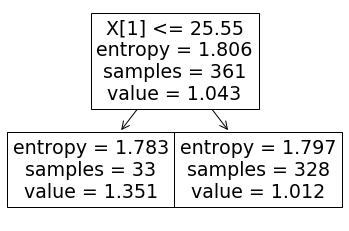

In [116]:
print("With PCA:")
makeDecisionTree(X_train_pca_FWI, Y_train_FWI, X_test_pca_FWI, Y_test_FWI)
print("Without PCA:")
makeDecisionTree(X_train_FWI, Y_train_FWI, X_test_FWI, Y_test_FWI)

**Random Forest**

In [54]:
print("With PCA:")
makeRandomForest(X_train_pca_FWI, Y_train_FWI, X_test_pca_FWI, Y_test_FWI)
print("Without PCA:")
makeRandomForest(X_train_FWI, Y_train_FWI, X_test_FWI, Y_test_FWI)

With PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.529498650951353
	MAE: 1.2252697536914785
Train results:
	RMSE: 1.3368170188670485
	MAE: 1.105591148742153
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5287019208789987
	MAE: 1.228100136078499
Train results:
	RMSE: 1.333889246157228
	MAE: 1.1009653510705135


**SVR**

In [55]:
print("With PCA:")
makeSVR(X_train_pca_FWI, Y_train_FWI, X_test_pca_FWI, Y_test_FWI)
print("Without PCA:")
makeSVR(X_train_FWI, Y_train_FWI, X_test_FWI, Y_test_FWI)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3253 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6432 tasks      | elapsed: 281.3min


Params: {'C': 10, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5196602453332972
	MAE: 1.2032275121955551
Train results:
	RMSE: 1.2958212498230848
	MAE: 1.0539149508834913
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 297.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4999 tasks      | elapsed: 38.2min


Params: {'C': 0.1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5196947226290747
	MAE: 1.2184227567956567
Train results:
	RMSE: 1.307817760273198
	MAE: 1.0793320437129834


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 104.7min finished


**K-NN**

In [56]:
print("With PCA:")
makeKNN(X_train_pca_FWI, Y_train_FWI, X_test_pca_FWI, Y_test_FWI)
print("Without PCA:")
makeKNN(X_train_FWI, Y_train_FWI, X_test_FWI, Y_test_FWI)

With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'n_neighbors': 9, 'p': 1}
Test results:
	RMSE: 1.6444899981337204
	MAE: 1.295570017344395
Train results:
	RMSE: 1.2576610611681809
	MAE: 1.0022761023394702
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Params: {'n_neighbors': 19, 'p': 2}
Test results:
	RMSE: 1.5628459173338196
	MAE: 1.2378467342362114
Train results:
	RMSE: 1.3077808868651786
	MAE: 1.0629878851021601


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


### 4.4 Weather Conditions

M – with the four weather conditions:
- temp
- RH
- wind
- rain

In [117]:
dataset_M = dataFrame[['temp', 'RH', 'wind', 'rain', 'area']].values

X_M = dataset_M[:,0:4]
Y_M = dataset_M[:,4]

In [118]:
X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split( X_M, Y_M, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_M)
# Apply transform to both the training set and the test set.
X_train_M = scaler.transform(X_train_M)
X_test_M = scaler.transform(X_test_M)

**PCA**

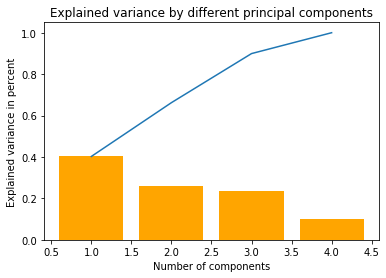

In [119]:
X_train_pca_M, X_test_pca_M = makePCA(X_train_M, X_test_M)

**Linear Regression**

In [60]:
print("With PCA:")
makeLinearRegression(X_train_pca_M, Y_train_M, X_test_pca_M, Y_test_M)
print("Without PCA:")
makeLinearRegression(X_train_M, Y_train_M, X_test_M, Y_test_M)

With PCA:
Test results:
	RMSE: 1.5242809059539673
	MAE: 1.2238415320169718
Train results:
	RMSE: 1.3397899080661808
	MAE: 1.1049175931556785
Without PCA:
Test results:
	RMSE: 1.5242809059539673
	MAE: 1.2238415320169718
Train results:
	RMSE: 1.3397899080661808
	MAE: 1.1049175931556785


**Decision Tree**

With PCA:
Params: {'criterion': 'friedman_mse', 'max_depth': 1}
Test results:
	RMSE: 1.5144100059558572
	MAE: 1.206102464910677
Train results:
	RMSE: 1.3268921615836997
	MAE: 1.0915181916318948
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5271850069349655
	MAE: 1.2145514341853476
Train results:
	RMSE: 1.3212002793374733
	MAE: 1.0727783774125212


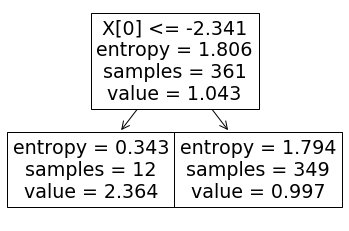

In [120]:
print("With PCA:")
makeDecisionTree(X_train_pca_M, Y_train_M, X_test_pca_M, Y_test_M)
print("Without PCA:")
makeDecisionTree(X_train_M, Y_train_M, X_test_M, Y_test_M)

**Random Forest**

In [62]:
print("With PCA:")
makeRandomForest(X_train_pca_M, Y_train_M, X_test_pca_M, Y_test_M)
print("Without PCA:")
makeRandomForest(X_train_M, Y_train_M, X_test_M, Y_test_M)

With PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.532273054045535
	MAE: 1.2258127069433873
Train results:
	RMSE: 1.3205342656621388
	MAE: 1.0807378946846065
Without PCA:
Params: {'criterion': 'mse', 'max_depth': 1}
Test results:
	RMSE: 1.5134441343093814
	MAE: 1.207632269633774
Train results:
	RMSE: 1.3170407825461228
	MAE: 1.0756544962085013


**SVR**

In [63]:
print("With PCA:")
makeSVR(X_train_pca_M, Y_train_M, X_test_pca_M, Y_test_M)
print("Without PCA:")
makeSVR(X_train_M, Y_train_M, X_test_M, Y_test_M)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6398 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'C': 100, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 1.518363206504399
	MAE: 1.2077041180611388
Train results:
	RMSE: 1.330822202859221
	MAE: 1.0899719061997868
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6358 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 6845 out of 6860 | elapsed: 12.2min remaining:    1.6s


Params: {'C': 100, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 1.5183632065043844
	MAE: 1.2077041180611183
Train results:
	RMSE: 1.3308222028592176
	MAE: 1.0899719061997826


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.6min finished


**K-NN**

In [64]:
print("With PCA:")
makeKNN(X_train_pca_M, Y_train_M, X_test_pca_M, Y_test_M)
print("Without PCA:")
makeKNN(X_train_M, Y_train_M, X_test_M, Y_test_M)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Params: {'n_neighbors': 19, 'p': 1}
Test results:
	RMSE: 1.5685404793275337
	MAE: 1.2305458795884863
Train results:
	RMSE: 1.3143425299902063
	MAE: 1.0727424795748908
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Params: {'n_neighbors': 19, 'p': 1}
Test results:
	RMSE: 1.534683917798609
	MAE: 1.1881556015526444
Train results:
	RMSE: 1.3174451935046074
	MAE: 1.069155512423531


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished
